In [1]:
%load_ext autoreload
%autoreload 2
# Base imports to use this project directly
import os
import sys
base_dir = os.path.dirname(os.path.abspath(''))
sys.path.insert(0, base_dir)
os.environ["PROJECT_DIR_PATH"] = base_dir

# Setup Tutorial
## Initialize Database

First a full setup of the Open-Street-Map Database via [osm-carto](https://github.com/gravitystorm/openstreetmap-carto/tree/master) and [osm2psql](https://osm2pgsql.org/):

```console
export PGHOST=psql-host
export PGPORT=psql-port
export PGDATABASE=psql-db
export PGUSER=psql-user
export PGPASS=psql-pass

git clone https://github.com/gravitystorm/openstreetmap-carto.git
cd openstreetmap-carto

osm2pgsql -H $PGHOST -P 8001 -d $PGDATABASE --create --slim  -G --hstore --tag-transform-script ./src/openstreetmap-carto.lua -C 2500 --number-processes 10 -S ./src/openstreetmap-carto.style ./<file_path_osm_planet_pbf>
```


## Initialized Framework Land-Use Dataframes

These steps assure that the required setup is performed to support landuse extraction from the osm-data

In [2]:
from smm.core.osm.setup import OSM_POI_SETUP
from smm.common.config import FRAMEWORK_ROOT

config = os.path.join(FRAMEWORK_ROOT, 'core', 'osm', 'config', "setup.yml")
sql_path = os.path.join(FRAMEWORK_ROOT, "tmp", "sql")

schema = "osm_schema"
ops = OSM_POI_SETUP(config)
ops.setup_osm_framework_base(schema=schema)
ops.update_framework_mappings(schema=schema)

c:\Users\ge78rey\AppData\Local\miniforge3\envs\smm\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.8.0-CAPI-1.13.1). Conversions between both will be slow.
  warnings.warn(
C:\Users\ge78rey\AppData\Local\Temp\ipykernel_31416\902693720.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://

## Get Land-Use Data

This shows a short example to extract the land-use data from the prepared PSQL-Database.

In [13]:
from smm.core.osm.setup import OSM_POI_SETUP
from smm.common.config import FRAMEWORK_ROOT

config = os.path.join(FRAMEWORK_ROOT, 'core', 'osm', 'config', "setup.yml")
sql_path = os.path.join(FRAMEWORK_ROOT, "tmp", "sql")

schema = "osm"
ops = OSM_POI_SETUP(config)
# Get land-use data depending on the regions boundary
landuse = ops.query_landuse("boundary_erding", schema=schema)

c:\Users\ge78rey\AppData\Local\miniforge3\envs\smm\lib\site-packages\geopandas\io\sql.py:158: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


<Axes: >

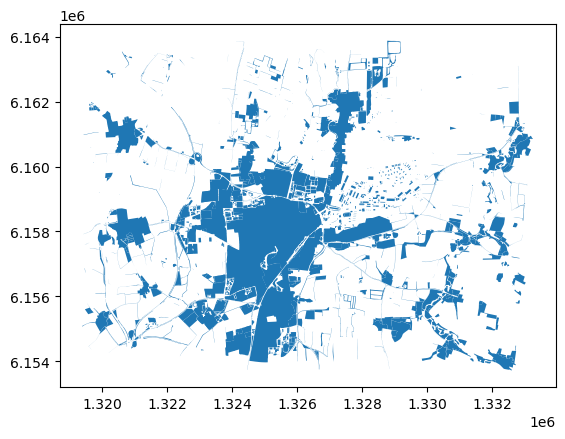

In [15]:
landuse.plot()